                  LANGKAH 1: MEMUAT DATASET SPAM                 


Saving spam.csv to spam.csv

Ukuran dataset: (5572, 3)
Distribusi kelas:
label
ham     4825
spam     747
Name: count, dtype: int64

Contoh data:
  label                                               text  label_num
0   ham  Go until jurong point, crazy.. Available only ...          0
1   ham                      Ok lar... Joking wif u oni...          0
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...          1
3   ham  U dun say so early hor... U c already then say...          0
4   ham  Nah I don't think he goes to usf, he lives aro...          0

                  LANGKAH 2: PREPROCESSING TEKS                  

Data latih: 4457 sampel
Data uji  : 1115 sampel

              MODEL 1: CountVectorizer + Stop Words              
Accuracy   : 0.9776 (97.76%)
Precision  : 0.9366
Recall     : 0.8926
F1-Score   : 0.9141

             MODEL 2: TF-IDF Vectorizer + Stop Words             
Accuracy   : 0.9704 (97.04%)
Precision  : 0.9915
Recall     : 0.7852
F1-Score   : 0.8764

      

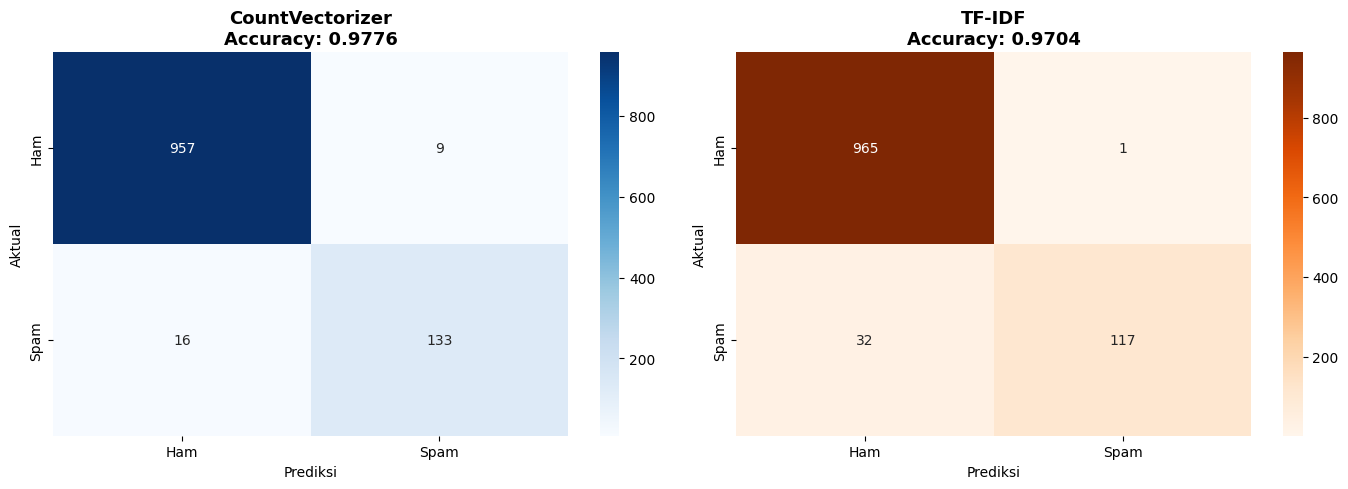

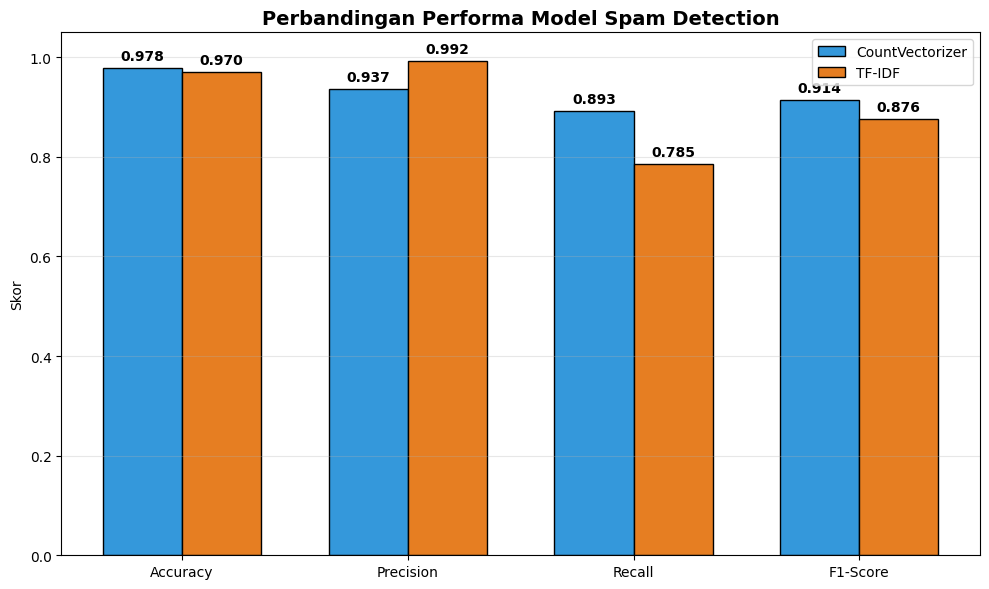


                    CONTOH PREDIKSI PESAN BARU                   
Pesan: Free entry in 2 a wkly comp to win FA Cup final tkts!
CountVectorizer → SPAM
TF-IDF         → SPAM
--------------------------------------------------
Pesan: Hey, are you free tonight for dinner?
CountVectorizer → HAM
TF-IDF         → HAM
--------------------------------------------------
Pesan: WINNER!! As a valued network customer you have been selected...
CountVectorizer → SPAM
TF-IDF         → SPAM
--------------------------------------------------

SELESAI! Semua tahapan telah dijalankan dengan sukses.


In [1]:
# =======================================================
# TUGAS 2 - DETEKSI SPAM MENGGUNAKAN MULTINOMIAL NAIVE BAYES
# Perbandingan CountVectorizer vs TF-IDF Vectorizer
# Dataset: spam.csv (UCI SMS Spam Collection)
# =======================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import re
import warnings
warnings.filterwarnings('ignore')

# --------------------- 1. MUAT DATA ---------------------
print("=" * 65)
print("LANGKAH 1: MEMUAT DATASET SPAM".center(65))
print("=" * 65)

# Upload file (hanya pertama kali)
try:
    from google.colab import files
    uploaded = files.upload()
except:
    print("Upload manual diabaikan (sudah ada file)")

# Baca dataset dengan penanganan encoding
df = pd.read_csv('spam.csv', encoding='latin-1')

# Ambil hanya kolom yang diperlukan
df = df[['v1', 'v2']]
df.columns = ['label', 'text']

# Mapping label: ham=0, spam=1
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})

print(f"\nUkuran dataset: {df.shape}")
print(f"Distribusi kelas:")
print(df['label'].value_counts())
print(f"\nContoh data:")
print(df.head())

# --------------------- 2. PREPROCESSING TEKS ---------------------
print("\n" + "=" * 65)
print("LANGKAH 2: PREPROCESSING TEKS".center(65))
print("=" * 65)

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)  # hapus angka & tanda baca
    return text

df['clean_text'] = df['text'].apply(clean_text)

# --------------------- 3. PEMBAGIAN DATA ---------------------
X = df['clean_text']
y = df['label_num']
y_labels = df['label']  # untuk confusion matrix

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nData latih: {len(X_train)} sampel")
print(f"Data uji  : {len(X_test)} sampel")

# --------------------- 4. MODEL 1: CountVectorizer ---------------------
print("\n" + "=" * 65)
print("MODEL 1: CountVectorizer + Stop Words".center(65))
print("=" * 65)

cv = CountVectorizer(stop_words='english', max_features=3000)
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

model_cv = MultinomialNB()
model_cv.fit(X_train_cv, y_train)
y_pred_cv = model_cv.predict(X_test_cv)

acc_cv = accuracy_score(y_test, y_pred_cv)
prec_cv = precision_score(y_test, y_pred_cv)
rec_cv = recall_score(y_test, y_pred_cv)
f1_cv = f1_score(y_test, y_pred_cv)

print(f"Accuracy   : {acc_cv:.4f} ({acc_cv*100:.2f}%)")
print(f"Precision  : {prec_cv:.4f}")
print(f"Recall     : {rec_cv:.4f}")
print(f"F1-Score   : {f1_cv:.4f}")

# --------------------- 5. MODEL 2: TF-IDF ---------------------
print("\n" + "=" * 65)
print("MODEL 2: TF-IDF Vectorizer + Stop Words".center(65))
print("=" * 65)

tfidf = TfidfVectorizer(stop_words='english', max_features=3000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

model_tfidf = MultinomialNB()
model_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = model_tfidf.predict(X_test_tfidf)

acc_tfidf = accuracy_score(y_test, y_pred_tfidf)
prec_tfidf = precision_score(y_test, y_pred_tfidf)
rec_tfidf = recall_score(y_test, y_pred_tfidf)
f1_tfidf = f1_score(y_test, y_pred_tfidf)

print(f"Accuracy   : {acc_tfidf:.4f} ({acc_tfidf*100:.2f}%)")
print(f"Precision  : {prec_tfidf:.4f}")
print(f"Recall     : {rec_tfidf:.4f}")
print(f"F1-Score   : {f1_tfidf:.4f}")

# --------------------- 6. PERBANDINGAN HASIL ---------------------
print("\n" + "=" * 65)
print("PERBANDINGAN PERFORMA MODEL".center(65))
print("=" * 65)

hasil = pd.DataFrame({
    'Metrik': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'CountVectorizer': [acc_cv, prec_cv, rec_cv, f1_cv],
    'TF-IDF': [acc_tfidf, prec_tfidf, rec_tfidf, f1_tfidf]
}).round(4)

print(hasil.to_string(index=False))

# Tentukan model terbaik berdasarkan Accuracy
best_model = "CountVectorizer" if acc_cv > acc_tfidf else "TF-IDF"
best_acc = max(acc_cv, acc_tfidf)

print(f"\n>>> MODEL TERBAIK: {best_model} dengan Accuracy {best_acc:.4f} ({best_acc*100:.2f}%)")

# --------------------- 7. VISUALISASI ---------------------
print("\n" + "=" * 65)
print("VISUALISASI HASIL".center(65))
print("=" * 65)

# Confusion Matrix
cm_cv = confusion_matrix(y_test, y_pred_cv)
cm_tfidf = confusion_matrix(y_test, y_pred_tfidf)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
sns.heatmap(cm_cv, annot=True, fmt='d', cmap='Blues', ax=ax1,
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
ax1.set_title(f'CountVectorizer\nAccuracy: {acc_cv:.4f}', fontsize=13, fontweight='bold')
ax1.set_ylabel('Aktual')
ax1.set_xlabel('Prediksi')

sns.heatmap(cm_tfidf, annot=True, fmt='d', cmap='Oranges', ax=ax2,
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
ax2.set_title(f'TF-IDF\nAccuracy: {acc_tfidf:.4f}', fontsize=13, fontweight='bold')
ax2.set_ylabel('Aktual')
ax2.set_xlabel('Prediksi')

plt.tight_layout()
plt.show()

# Bar Chart Perbandingan Metrik
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(4)
width = 0.35

bars1 = ax.bar(x - width/2, [acc_cv, prec_cv, rec_cv, f1_cv], width,
               label='CountVectorizer', color='#3498db', edgecolor='black')
bars2 = ax.bar(x + width/2, [acc_tfidf, prec_tfidf, rec_tfidf, f1_tfidf], width,
               label='TF-IDF', color='#e67e22', edgecolor='black')

ax.set_ylim(0, 1.05)
ax.set_xticks(x)
ax.set_xticklabels(['Accuracy', 'Precision', 'Recall', 'F1-Score'])
ax.set_ylabel('Skor')
ax.set_title('Perbandingan Performa Model Spam Detection', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(axis='y', alpha=0.3)

# Tambah nilai di atas bar
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.01,
            f'{height:.3f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# --------------------- 8. CONTOH PREDIKSI ---------------------
print("\n" + "=" * 65)
print("CONTOH PREDIKSI PESAN BARU".center(65))
print("=" * 65)

def prediksi_pesan(pesan):
    pesan_bersih = clean_text(pesan)
    vec_cv = cv.transform([pesan_bersih])
    vec_tfidf = tfidf.transform([pesan_bersih])

    pred_cv = model_cv.predict(vec_cv)[0]
    pred_tfidf = model_tfidf.predict(vec_tfidf)[0]

    label_cv = "SPAM" if pred_cv == 1 else "HAM"
    label_tfidf = "SPAM" if pred_tfidf == 1 else "HAM"

    print(f"Pesan: {pesan}")
    print(f"CountVectorizer → {label_cv}")
    print(f"TF-IDF         → {label_tfidf}")
    print("-" * 50)

# Uji coba
prediksi_pesan("Free entry in 2 a wkly comp to win FA Cup final tkts!")
prediksi_pesan("Hey, are you free tonight for dinner?")
prediksi_pesan("WINNER!! As a valued network customer you have been selected...")

print("\nSELESAI! Semua tahapan telah dijalankan dengan sukses.")
print("=" * 65)